# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


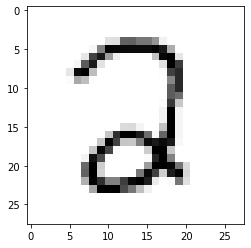

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2524
Training Accuracy: 0.5040, Testing Accuracy: 0.5020



Epoch 10, Loss 0.1858
Training Accuracy: 0.8534, Testing Accuracy: 0.8548



Epoch 20, Loss 0.0949
Training Accuracy: 0.9029, Testing Accuracy: 0.9178



Epoch 30, Loss 0.0624
Training Accuracy: 0.9306, Testing Accuracy: 0.9430



Epoch 40, Loss 0.0485
Training Accuracy: 0.9450, Testing Accuracy: 0.9567



Epoch 50, Loss 0.0412
Training Accuracy: 0.9515, Testing Accuracy: 0.9627



Epoch 60, Loss 0.0368
Training Accuracy: 0.9572, Testing Accuracy: 0.9662



Epoch 70, Loss 0.0338
Training Accuracy: 0.9608, Testing Accuracy: 0.9677



Epoch 80, Loss 0.0316
Training Accuracy: 0.9632, Testing Accuracy: 0.9703



Epoch 90, Loss 0.0298
Training Accuracy: 0.9644, Testing Accuracy: 0.9703



Epoch 100, Loss 0.0284
Training Accuracy: 0.9659, Testing Accuracy: 0.9718



Epoch 110, Loss 0.0272
Training Accuracy: 0.9680, Testing Accuracy: 0.9718



Epoch 120, Loss 0.0261
Training Accuracy: 0.9690, Testing Accuracy: 0.9713



Epoch 130, Loss 0.0252
Training Accuracy: 0.9705, Testing Accuracy: 0.9713



Epoch 140, Loss 0.0244
Training Accuracy: 0.9713, Testing Accuracy: 0.9718



Epoch 150, Loss 0.0236
Training Accuracy: 0.9725, Testing Accuracy: 0.9723



Epoch 160, Loss 0.0229
Training Accuracy: 0.9734, Testing Accuracy: 0.9723



Epoch 170, Loss 0.0223
Training Accuracy: 0.9744, Testing Accuracy: 0.9723



Epoch 180, Loss 0.0217
Training Accuracy: 0.9749, Testing Accuracy: 0.9728



Epoch 190, Loss 0.0212
Training Accuracy: 0.9759, Testing Accuracy: 0.9738



Epoch 200, Loss 0.0207
Training Accuracy: 0.9769, Testing Accuracy: 0.9743



Epoch 210, Loss 0.0202
Training Accuracy: 0.9776, Testing Accuracy: 0.9753



Epoch 220, Loss 0.0197
Training Accuracy: 0.9780, Testing Accuracy: 0.9743



Epoch 230, Loss 0.0193
Training Accuracy: 0.9785, Testing Accuracy: 0.9753



Epoch 240, Loss 0.0189
Training Accuracy: 0.9787, Testing Accuracy: 0.9758



0.002488695779482448

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2378
Training Accuracy: 0.6915, Testing Accuracy: 0.7409



Epoch 10, Loss 0.1022
Training Accuracy: 0.9124, Testing Accuracy: 0.9264



Epoch 20, Loss 0.0785
Training Accuracy: 0.9294, Testing Accuracy: 0.9425



Epoch 30, Loss 0.0676
Training Accuracy: 0.9372, Testing Accuracy: 0.9506



Epoch 40, Loss 0.0611
Training Accuracy: 0.9422, Testing Accuracy: 0.9541



Epoch 50, Loss 0.0566
Training Accuracy: 0.9449, Testing Accuracy: 0.9561



Epoch 60, Loss 0.0534
Training Accuracy: 0.9477, Testing Accuracy: 0.9577



Epoch 70, Loss 0.0509
Training Accuracy: 0.9503, Testing Accuracy: 0.9592



Epoch 80, Loss 0.0489
Training Accuracy: 0.9514, Testing Accuracy: 0.9602



Epoch 90, Loss 0.0472
Training Accuracy: 0.9523, Testing Accuracy: 0.9612



Epoch 100, Loss 0.0458
Training Accuracy: 0.9534, Testing Accuracy: 0.9612



Epoch 110, Loss 0.0446
Training Accuracy: 0.9542, Testing Accuracy: 0.9617



Epoch 120, Loss 0.0435
Training Accuracy: 0.9548, Testing Accuracy: 0.9617



Epoch 130, Loss 0.0426
Training Accuracy: 0.9560, Testing Accuracy: 0.9627



Epoch 140, Loss 0.0418
Training Accuracy: 0.9572, Testing Accuracy: 0.9637



Epoch 150, Loss 0.0411
Training Accuracy: 0.9583, Testing Accuracy: 0.9637



Epoch 160, Loss 0.0404
Training Accuracy: 0.9585, Testing Accuracy: 0.9647



Epoch 170, Loss 0.0398
Training Accuracy: 0.9590, Testing Accuracy: 0.9652



Epoch 180, Loss 0.0392
Training Accuracy: 0.9593, Testing Accuracy: 0.9652



Epoch 190, Loss 0.0387
Training Accuracy: 0.9599, Testing Accuracy: 0.9652



Epoch 200, Loss 0.0383
Training Accuracy: 0.9606, Testing Accuracy: 0.9652



Epoch 210, Loss 0.0378
Training Accuracy: 0.9608, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0374
Training Accuracy: 0.9609, Testing Accuracy: 0.9652



Epoch 230, Loss 0.037
Training Accuracy: 0.9612, Testing Accuracy: 0.9652



Epoch 240, Loss 0.0367
Training Accuracy: 0.9614, Testing Accuracy: 0.9652



0.031131270087943

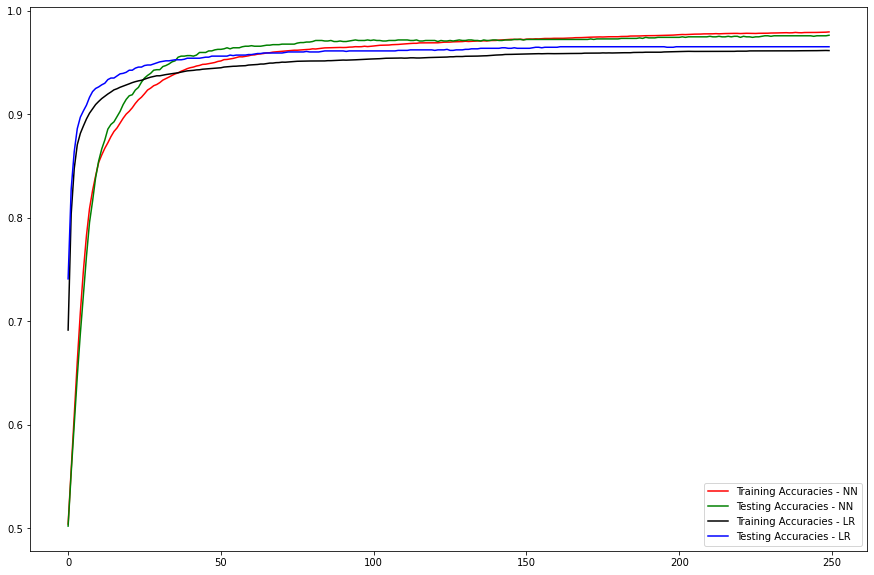

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

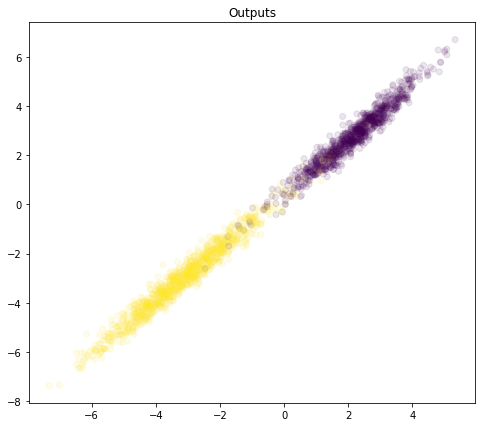

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

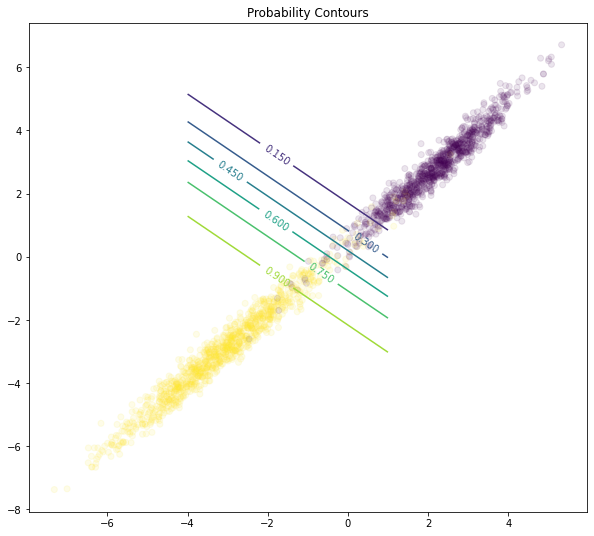

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );